# Proyecto Sprint 10 - Aprendizaje automático en negocios
***
En este proyecto, tengo la tarea de identificar la ubicación del pozo petrolero más rentable para la empresa minera OilyGiant mediante el análisis de datos geológicos de tres regiones diferentes. El proyecto implica construir un modelo de regresión lineal para predecir el volumen de reservas de cada pozo de petróleo en función de sus parámetros, como la calidad del petróleo y el volumen de reservas. Utilizando estas predicciones, seleccionaré los pozos más prometedores y determinaré la región que ofrece el mayor potencial de ganancias totales. El análisis incorporará la técnica Bootstrapping para evaluar las ganancias potenciales y los riesgos asociados, asegurando que la decisión final cumpla con el requisito de la empresa de mantener un riesgo de pérdida por debajo del 2,5%. El objetivo es maximizar el retorno de la inversión eligiendo la región óptima para el desarrollo de nuevos pozos petroleros y al mismo tiempo satisfacer restricciones comerciales específicas.

Para cada región considerada, se evaluará un grupo inicial de 500 sitios potenciales para seleccionar los 200 principales con las reservas de petróleo más prometedoras para el cálculo de ganancias. El presupuesto asignado para el desarrollo de estos 200 pozos se fija en 100 millones. Económicamente, se espera que cada barril de petróleo genere 4,5 dólares de ingresos, en el entendido de que los volúmenes de reservas de petróleo se miden en miles de barriles, lo que hace que los ingresos por una unidad de producto sean 4.500. Después de la evaluación de riesgos, solo se considerarán para el desarrollo aquellas regiones con un riesgo de pérdida inferior al 2,5%. Entre ellas, se elegirá la región con mayor beneficio medio como lugar para el desarrollo de nuevos pozos petroleros.

<div class="alert alert-block alert-success">
<b>Review General. (Iteración 1) </b> <a class="tocSkip"></a>


Hola, siempre me tomo este tiempo al inicio de tu proyecto para comentar mis apreciaciones generales de esta iteración de tu entrega. 
    

Me gusta comenzar dando la bienvenida al mundo de los datos a los estudiantes, te deseo lo mejor y espero que consigas lograr tus objetivos. Personalmente me gusta brindar el siguiente consejo, "Está bien equivocarse, es normal y es lo mejor que te puede pasar. Aprendemos de los errores y eso te hará mejor programador ya que podrás descubrir cosas a medida que avances y son estas cosas las que te darán esa experiencia para ser un gran Data Scientist"
    
Ahora si yendo a esta notebook. Quiero felicitarte porque has hecho un gran trabajo a lo largo de toda la notebook, desde las interpretaciones hasta las implementaciones, se ha notado un gran manejo de las herramientas y una gran comprensión de los resultados obtenidos. Felicitaciones, tu trabajo esta en las mejores condiciones para ser aprobado.

Éxitos dentro de tu camino en el mundo de los datos, saludos!

In [1]:
# Importar bibliotecas
import numpy as np
import pandas as pd
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## Descarga y prepara los datos.

### subir archivos

In [2]:
# Cargar archivos
geo_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_2 = pd.read_csv('/datasets/geo_data_2.csv')
data_sets = [geo_0, geo_1, geo_2]

### Examinar DataFrame

In [3]:
# Mostrando las primeras cinco filas en los tres conjuntos de datos
n =0
for i in data_sets:
    print(f'geo_{n}:')
    print(geo_0.head())
    print(' ')
    n = n+1

geo_0:
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
 
geo_1:
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
 
geo_2:
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
 


In [4]:
# Mostrar el tamaño de los tres conjuntos de datos
n =0
for i in data_sets:
    print(f'geo_{n}:')
    print(geo_0.shape)
    print(' ')
    n = n+1

geo_0:
(100000, 5)
 
geo_1:
(100000, 5)
 
geo_2:
(100000, 5)
 


In [5]:
# Mostrar Dtypes de los tres conjuntos de datos
n =0
for i in data_sets:
    print(f'geo_{n}:')
    print(geo_0.dtypes)
    print(' ')
    n = n+1

geo_0:
id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object
 
geo_1:
id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object
 
geo_2:
id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object
 


In [6]:
# Mostrar estadísticas descriptivas de los tres conjuntos de datos
n =0
for i in data_sets:
    print(f'geo_{n}:')
    print(geo_0.describe())
    print(' ')
    n = n+1

geo_0:
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347
 
geo_1:
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.4

In [7]:
# Mostrar información general de los tres conjuntos de datos
n =0
for i in data_sets:
    print(f'geo_{n}:')
    print(geo_0.info())
    print(' ')
    n = n+1

geo_0:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
 
geo_1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
 
geo_2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 

### Descripción y observaciones del DataFrame.

Cada observación en el dataset contiene información del comportamiento mensual sobre un usuario. La información dada es la siguiente:

<code style="background:grey;color:black">id</code> — identificador único de pozo de petróleo
<br>
<code style="background:grey;color:black">f0, f1, f2</code> — tres características de los puntos (su significado específico no es importante, pero las características en sí son significativas)
<br>
<code style="background:grey;color:black">product</code> — volumen de reservas en el pozo de petróleo (miles de barriles).

Hay un total de 100.000 observaciones en cada conjunto de datos

- En los datos no observo valores NaN, ningún tipo D incorrecto ni nada más que deba corregirse.
- La columna <code style="background:grey;color:black">id</code> se eliminará de los DataFrames ya que no es necesaria para nuestro modelo.

### Preparación de datos para la capacitación y validación del modelo

In [8]:
geo_0 = geo_0.drop('id', axis=1)
geo_1 = geo_1.drop('id', axis=1)
geo_2 = geo_2.drop('id', axis=1)

In [9]:
# Mostrando las primeras cinco filas en los tres conjuntos de datos
n =0
for i in data_sets:
    print(f'geo_{n}:')
    print(geo_0.head())
    print(' ')
    n = n+1

geo_0:
         f0        f1        f2     product
0  0.705745 -0.497823  1.221170  105.280062
1  1.334711 -0.340164  4.365080   73.037750
2  1.022732  0.151990  1.419926   85.265647
3 -0.032172  0.139033  2.978566  168.620776
4  1.988431  0.155413  4.751769  154.036647
 
geo_1:
         f0        f1        f2     product
0  0.705745 -0.497823  1.221170  105.280062
1  1.334711 -0.340164  4.365080   73.037750
2  1.022732  0.151990  1.419926   85.265647
3 -0.032172  0.139033  2.978566  168.620776
4  1.988431  0.155413  4.751769  154.036647
 
geo_2:
         f0        f1        f2     product
0  0.705745 -0.497823  1.221170  105.280062
1  1.334711 -0.340164  4.365080   73.037750
2  1.022732  0.151990  1.419926   85.265647
3 -0.032172  0.139033  2.978566  168.620776
4  1.988431  0.155413  4.751769  154.036647
 


## Entrenar y probar el modelo para cada región
***

A continuación, los datos se dividirán en consecuencia:

- 75% conjunto de entrenamiento
- 25% conjunto de validación

Nuestro modelo será entrenado sobre el conjunto de entrenamiento, para luego poder predecir el volumen de reservas en el pozo petrolero.

In [10]:
# Función para entrenar un modelo y hacer predicciones.
def train_test_predict(data):
    """ 
    Esta función declara variables para características y objetivos, 
    divide los datos en conjuntos de entrenamiento y validación, 
    entrena el modelo y realiza predicciones utilizando un algoritmo de regresión lineal.
    """

    # declarar variables para features and target
    target = data['product']
    features = data.drop(['product'], axis=1)

    # dividir los datos en 75% de conjuntos de entrenamiento y 25% de validación
    features_train, features_test, target_train, target_test = train_test_split(
        features, target, test_size=0.25, random_state=12345
    )
    
    # características de escalado
    scaler = StandardScaler()
    scaler.fit(features_train)
    # transform the training set and the test set using transform()
    features_train = scaler.transform(features_train)
    features_test  = scaler.transform(features_test)

    # modelo de regresión lineal
    model = LinearRegression()
    model.fit(features_train, target_train) # train model
    test_predictions = pd.Series(model.predict(features_test), index=target_test.index) # make prediction using test set
    return test_predictions, target_test

# función para calcular métricas de regresión
def reg_metrics(y_test, y_pred):
    print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
    print('Puntuación de varianza explicada: %.4f' % explained_variance_score(y_test, y_pred))
    print('Mean squared error: %.3f' % mean_squared_error(y_test, y_pred))
    print("RMSE: %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
    print('Puntuación de varianza: %.4f' % r2_score(y_test, y_pred))
    forecast_err = np.array(y_test) - np.array(y_pred)
    print('Sesgo de pronóstico: %.4f' % (np.sum(forecast_err) * 1.0/len(y_pred)))

### Geo_0

In [11]:
# almacenar predicciones y probar conjuntos de datos
test_predictions_0, target_test_0 = train_test_predict(geo_0)

# métrica de regresión para geo_0
reg_metrics(test_predictions_0, target_test_0)

# volumen de reservas previstas y reservas reales
print('Volumen medio de reservas: %.2f' % target_test_0.mean())
print('El volumen promedio de reservas previstas es: %.2f' % test_predictions_0.mean())
print("El RMSE del modelo es: %.4f" % np.sqrt(mean_squared_error(test_predictions_0, target_test_0)))

Mean absolute error: 30.92
Puntuación de varianza explicada: -1.6286
Mean squared error: 1412.213
RMSE: 37.5794
Puntuación de varianza: -1.6291
Sesgo de pronóstico: 0.5140
Volumen medio de reservas: 92.08
El volumen promedio de reservas previstas es: 92.59
El RMSE del modelo es: 37.5794


### Geo_1

In [12]:
# almacenar predicciones y probar conjuntos de datos
test_predictions_1, target_test_1 = train_test_predict(geo_1)

# métrica de regresión para geo_1
reg_metrics(test_predictions_1, target_test_1)

# volumen de reservas previstas y reservas reales
print('Volumen medio de reservas: %.2f' % target_test_1.mean())
print('El volumen promedio de reservas previstas es: %.2f' % test_predictions_1.mean())
print("El RMSE del modelo es: %.4f" % np.sqrt(mean_squared_error(test_predictions_1, target_test_1)))

Mean absolute error: 0.72
Puntuación de varianza explicada: 0.9996
Mean squared error: 0.798
RMSE: 0.8931
Puntuación de varianza: 0.9996
Sesgo de pronóstico: 0.0054
Volumen medio de reservas: 68.72
El volumen promedio de reservas previstas es: 68.73
El RMSE del modelo es: 0.8931


### Geo_2

In [13]:
# almacenar predicciones y probar conjuntos de datos
test_predictions_2, target_test_2 = train_test_predict(geo_2)

# métrica de regresión para geo_2
reg_metrics(test_predictions_2, target_test_2)

# volumen de reservas previstas y reservas reales
print('Volumen medio de reservas: %.2f' % target_test_2.mean())
print('El volumen promedio de reservas previstas es: %.2f' % test_predictions_2.mean())
print("El RMSE del modelo es: %.4f" % np.sqrt(mean_squared_error(test_predictions_2, target_test_2)))

Mean absolute error: 32.79
Puntuación de varianza explicada: -3.0653
Mean squared error: 1602.378
RMSE: 40.0297
Puntuación de varianza: -3.0653
Sesgo de pronóstico: 0.0808
Volumen medio de reservas: 94.88
El volumen promedio de reservas previstas es: 94.97
El RMSE del modelo es: 40.0297


### Conclusión

**geo_0**
- La puntuación R2 de **-1,62** significa que la calidad del modelo es baja
- El error medio de cada pozo es de **30,92 mil barriles**.
- El valor RMSE de **37,58 mil** es relativamente alto y podría indicar valores atípicos en los datos
- El modelo sobrepredice las reservas promedio

**geo_1**
- La puntuación R2 de **0,9996** indica que la calidad del modelo es alta
- El bajo valor MAE de **0,72 mil** barriles significa que el modelo es un predictor perfecto de la reserva en esta región
- El bajo valor RMSE de **0,89 mil** barriles indica que el modelo está dando una predicción cercana a la reserva real

**geo_2**
- La métrica R2 es muy baja, **-3,06**, lo que indica una mala calidad del modelo.
- El alto valor MAE de **32,79 mil** barriles y el alto valor RMSE de **40,03 mil** barriles indican una sobrepredicción del valor promedio de las reservas por parte del modelo.


## Preparar datos para el cálculo de ganancias
***

In [14]:
# Almacenar valores clave en variables separadas
region_points = 500 # Se necesitan 500 pozos petroleros
best_region_for_profit = 200 # 200 pozos petroleros
capital_cost = 100 * 10**6 # Presupuesto de desarrollo para 200 pozos (100 millones de dólares).
cost_per_bbl = 4.5 # ingresos de 1 unidad de producto (en miles de barriles) = $4,500
risk_of_losses = 0.025

In [15]:
# calcular el volumen de reservas para desarrollar un nuevo pozo sin pérdidas
revenue = cost_per_bbl * best_region_for_profit
volume_of_reserves = capital_cost / revenue
print('El volumen de reservas necesario para desarrollar un nuevo pozo sin pérdidas: %.2f' % volume_of_reserves, 'Stock Tank Barrels (STB).')

El volumen de reservas necesario para desarrollar un nuevo pozo sin pérdidas: 111111.11 Stock Tank Barrels (STB).


- Calculando el volumen de reservas suficientes para desarrollar un nuevo pozo sin pérdidas en **111,11 mil** barriles. Este volumen será nuestro **valor de referencia**
- Al comparar este valor con el volumen promedio de reservas en cada región, podemos ver que el volumen promedio de reservas en cada región es **inferior a 111,11 mil** barriles.

## Calcule las ganancias 
***

In [16]:
# función para calcular la predicción más alta en cada región
def highest_prediction(y_test, y_pred, count):
    highest_reserves_volume_predicted = y_pred.sort_values(ascending=False)
    selected_reserves_volume_target = y_test[highest_reserves_volume_predicted.index][:count]
    total_selected_reserves_volume_target = selected_reserves_volume_target.sum() * 1000
    print('El valor más alto previsto en esta región es: %.2f' % total_selected_reserves_volume_target,
          'STB o %.2f' % (total_selected_reserves_volume_target / 10**6), 'MMSTB')

# función para calcular las ganancias de un conjunto de pozos petroleros seleccionados y predicciones de modelos
def reserves_profit(y_test, y_pred, count):
    highest_reserves_volume_predicted = y_pred.sort_values(ascending=False)
    selected_reserves_volume_target = y_test[highest_reserves_volume_predicted.index][:count]
    total_selected_reserves_volume_target = selected_reserves_volume_target.sum() * 1000
    selected_reserves_profit = total_selected_reserves_volume_target * cost_per_bbl - capital_cost
    print('La ganancia de reservas seleccionada es: $%.2f' % selected_reserves_profit)

### Valores de las predicciones

#### Geo_0

In [17]:
# predicción del valor más alto en geo_0
highest_prediction(target_test_0, test_predictions_0, 200)

El valor más alto previsto en esta región es: 29601835.65 STB o 29.60 MMSTB


#### Geo_1

In [18]:
# predicción del valor más alto en geo_1
highest_prediction(target_test_1, test_predictions_1, 200)

El valor más alto previsto en esta región es: 27589081.55 STB o 27.59 MMSTB


#### Geo_2

In [19]:
# predicción del valor más alto en geo_2
highest_prediction(target_test_2, test_predictions_2, 200)

El valor más alto previsto en esta región es: 28245222.14 STB o 28.25 MMSTB


El valor más alto previsto dentro de las tres regiones se observa en **geo_0**

### Ganancias por volumen de reservas en cada región

#### Geo_0

In [20]:
# Ganancias de un conjunto de pozos petroleros seleccionados y predicciones de modelos en geo_0
reserves_profit(target_test_0, test_predictions_0, 200)

La ganancia de reservas seleccionada es: $33208260.43


#### Geo_1

In [21]:
# Ganancias de un conjunto de pozos petroleros seleccionados y predicciones de modelos en geo_1
reserves_profit(target_test_1, test_predictions_1, 200)

La ganancia de reservas seleccionada es: $24150866.97


#### Geo_2

In [22]:
# Ganancias de un conjunto de pozos petroleros seleccionados y predicciones de modelos en geo_2
reserves_profit(target_test_2, test_predictions_2, 200)

La ganancia de reservas seleccionada es: $27103499.64


La ganancia más alta prevista dentro de las tres regiones se observa en **geo_0**. La ganancia es **33 millones de dólares**

## Calcule los riesgos y ganancias para cada región
***

Utilizando la técnica bootstrapping para la distribución de ganancias

In [23]:
# calcular la distribución de ganancias
def revenue(y_test, y_pred, count):
    highest_reserves_volume_predicted = y_pred.sort_values(ascending=False)
    selected_reserves_volume_target = y_test[highest_reserves_volume_predicted.index][:count]
    total_selected_reserves_volume_target = selected_reserves_volume_target.sum() * 1000
    selected_reserves_profit = total_selected_reserves_volume_target * cost_per_bbl - capital_cost
    return selected_reserves_profit

# calcular las ganancias a partir de 1000 muestras de ingresos utilizando la técnica de arranque
def bootstrapping_revenue(y_test, y_pred):
    state = np.random.RandomState(12345) 
    
    # almacenar los valores cuantiles del 99% en la variable de beneficio
    profit = []
    for i in range(1000):
        target_subsample = y_test.sample(n=region_points, replace=True, random_state=state)
        predicted_subsample = y_pred[target_subsample.index]
        profit.append(revenue(target_subsample, predicted_subsample, best_region_for_profit))
    return pd.Series(profit)

# calcular las ganancias de arranque, el intervalo de confianza y el riesgo de pérdidas
def bootstrap_profit_ci_risk(y_test, y_pred):
    profit = bootstrapping_revenue(y_test, y_pred) # ambiar el tipo por conveniencia
    mean_profit = profit.mean() # ganancias promedio
    confidence_interval = st.t.interval(
        0.95, len(profit)-1, mean_profit, profit.sem()
    ) # 95% C.I.
    losses = profit[profit < 0]
    risk_of_losses = len(losses) / len(profit)
    print('La ganancia promedio es: %.2f' % mean_profit)
    print('El intervalo de confianza del 95%: ', confidence_interval)
    print('El riesgo de pérdidas es: {:.2%}'.format(risk_of_losses))

A continuación encontraré la ganancia promedio, los intervalos de confianza del 95% y el riesgo de pérdidas en cada región:

### Geo_0

In [24]:
# ganancias promedio, 95% C.I: y riesgo en geo_0
bootstrap_profit_ci_risk(target_test_0, test_predictions_0)

La ganancia promedio es: 4259385.27
El intervalo de confianza del 95%:  (4087322.0706869857, 4431448.467524861)
El riesgo de pérdidas es: 6.00%


### Geo_1

In [25]:
# ganancias promedio, 95% C.I: y riesgo en geo_1
bootstrap_profit_ci_risk(target_test_1, test_predictions_1)

La ganancia promedio es: 5152227.73
El intervalo de confianza del 95%:  (5016214.761763217, 5288240.70710258)
El riesgo de pérdidas es: 1.00%


### Geo_2

In [26]:
# ganancias promedio, 95% C.I: y riesgo en geo_2
bootstrap_profit_ci_risk(target_test_2, test_predictions_2)

La ganancia promedio es: 4350083.63
El intervalo de confianza del 95%:  (4174535.520413578, 4525631.735241534)
El riesgo de pérdidas es: 6.40%


### Distribución de ganancias

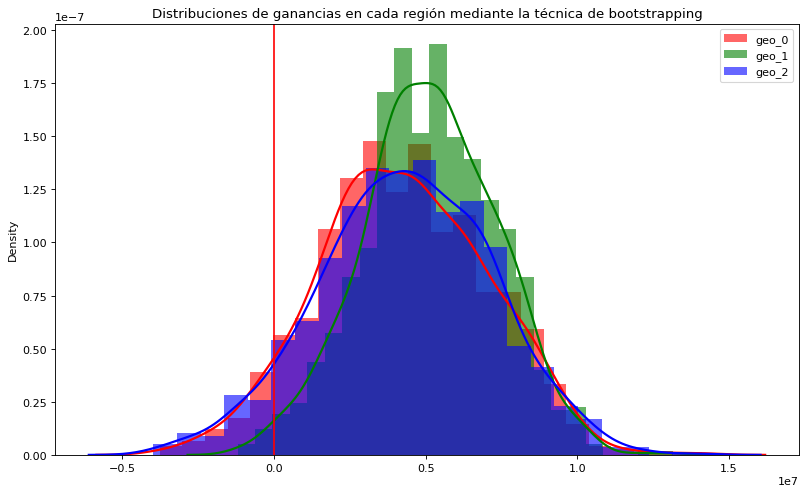

In [27]:
# ganancias de cada región
geo_0_profit = bootstrapping_revenue(target_test_0, test_predictions_0)
geo_1_profit = bootstrapping_revenue(target_test_1, test_predictions_1)
geo_2_profit = bootstrapping_revenue(target_test_2, test_predictions_2)

# diagrama de distribuciones
kwargs = dict(hist_kws={'alpha': 0.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(12,7), dpi= 80)
sns.distplot(geo_0_profit, color='red', label='geo_0', **kwargs)
sns.distplot(geo_1_profit, color='green', label='geo_1', **kwargs)
sns.distplot(geo_2_profit, color='blue', label='geo_2', **kwargs)
plt.axvline(0, c="r")
plt.title('Distribuciones de ganancias en cada región mediante la técnica de bootstrapping')
plt.legend();

Desde la técnica de bootstrapping se obtiene la mayor distribución de ganancias, **50 millones de USD - 52 millones de USD**, la ganancia promedio más alta, **51 millones de USD**, y el menor riesgo de pérdidas, **1.00%**. encontrado en el geo_1.

## Conclusión
***

El objetivo de este proyecto es encontrar el mejor lugar para un nuevo pozo para la empresa minera OilyGiant.

Primero, descargué los conjuntos de datos de las tres regiones e investigué la información general para encontrar fallas y fallas en los datos.
- Cada uno de los conjuntos de datos contiene **100.000** observaciones y **3 columnas**.
- Lo único que había que corregir era la columna <code style="background:grey;color:black">id</code> que se eliminó.

Posteriormente se realizó lo siguiente:
- Los datos se dividieron en un conjunto de entrenamiento **(75%)** y un conjunto de entrenamiento **(25%)**
- Se estandarizaron las características numéricas de los datos.
- La tabla resultante tenía 75000 filas y 3 funciones para el conjunto de entrenamiento, y 25000 filas y 3 funciones para el conjunto de prueba.
- Entrené el modelo e hice predicciones usando un Algoritmo de Regresión Lineal.
- Predije el volumen de reservas de los pozos de petróleo.
- Luego calculé diferentes métricas de regresión.
    - **geo_0:** la métrica **R2 es -1,62**, lo que significa que la calidad del modelo es baja, el error medio para cada pozo es **30,92 mil barriles** y el alto valor **RMSE de 37,58 mil barriles** indica que puede haber valores atípicos en los datos.
    - **geo_1:** la métrica **R2 es 0,9996**, lo que indica que la calidad del modelo es buena. El bajo valor MAE de **0,72 mil barriles** significa que el modelo es un predictor perfecto de la reserva en esta región, y el bajo valor **RMSE de 0,89 mil barriles** indica que el modelo está dando una predicción cercana a la reserva real.
    - **geo_2:** la métrica **R2 es muy baja, -3,06**, lo que indica una mala calidad del modelo en esta región. El alto valor MAE de **32,79 mil barriles** y el alto valor **RMSE de 40,03 mil barriles** indican una predicción excesiva del valor promedio de las reservas por parte del modelo en geo_2.
    - Calculamos el volumen de reservas suficientes para desarrollar un nuevo pozo sin pérdida de ganancias **(111,11 mil barriles)**
- Comparando este valor con el volumen promedio de reservas en cada región, vemos que el volumen promedio de reservas en cada región es inferior a **111,11 mil barriles**
- Desarrollé una función para calcular la ganancia de un conjunto de pozos petroleros seleccionados y predicciones de modelos. Del cálculo de los valores más altos de predicción, podemos ver que geo_0 tiene la predicción más alta de las tres regiones. geo_0 puede ser una región prometedora para continuar con más actividades de perforación.
- Apliqué la técnica de bootstrapping para encontrar la distribución de utilidad. - Calculé el beneficio medio, el intervalo de confianza del 95% y el riesgo de pérdidas. De los cálculos realizados observamos que:
    - **geo_1** tiene la mayor distribución de ganancias, la mayor ganancia promedio y el menor riesgo de pérdidas que cualquier otra región.
    - **geo_1** generó el beneficio promedio más alto que otras regiones con un riesgo de pérdidas inferior al 2,5%, podemos recomendar que la empresa minera OilyGiant se centre más en geo_1 para el desarrollo de los pozos petroleros.
    
**Recomendaciones:**

Con base en los hallazgos, la recomendación es continuar con el desarrollo de pozos petroleros en **geo_1**. La combinación de altas reservas previstas, ganancias promedio sustanciales y bajo riesgo de pérdida hace que **geo_1** sea la opción óptima cuando se trata de desarrollos de nuevos pozos petroleros.

**Geo_0** y **geo_2:**: se ha determinado que estas regiones son demasiado riesgosas para el desarrollo. El riesgo de pérdida excede los umbrales aceptables y las ganancias potenciales no justifican el mayor riesgo.

En conclusión, **geo_1** ofrece el mejor equilibrio entre rentabilidad y riesgo, lo que lo convierte en la opción más viable para el desarrollo de nuevos pozos petroleros. No recomiendo invertir en **geo_0** y **geo_2** debido a sus perfiles de riesgo desfavorables.